# Part I - Loan Data from Prosper dataset exploration 
## by Muyul Alsubaie

>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.






## Preliminary Wrangling


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [5]:
# load the dataset
PL = pd.read_csv('prosperLoanData.csv')

In [6]:
pd.set_option('display.max_columns', None) #to display all columns
PL.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [7]:
# descriptive statistics for numeric variables
print(PL.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [8]:
PL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
PL.shape


(113937, 81)

In [10]:
PL.dtypes


ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

### What is the structure of your dataset?

> The dataset contains 113,937 loans with 81 features, most varviables are numeric.

### What is/are the main feature(s) of interest in your dataset?

>  I'm intrested in the borrower's Annual Percentage Rate (APR) for the loan, and Which lender features are most predictive of the highest rate of return.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> EstimatedReturn, IncomeRange,Debt to Income Ratio, and BorrowerAPR.

## Univariate Exploration
### BorrowerAPR

> I'll start by looking at the distribution of the main variable of interest: borrower APR.




In [11]:
#A custom method to display all the required plots
def display_plot(variable, xlabel,title):
    
    # Method will take four parameters the first two variables are for the used data
    #2nd, 3rd and 4th parameters are to determine the axes names and title 
    plot.figure(figsize=[8,5])
    variable.plot(kind='hist',color='#b6d7a8',bins=80)
    plot.xlabel(' ')
    plot.title('');

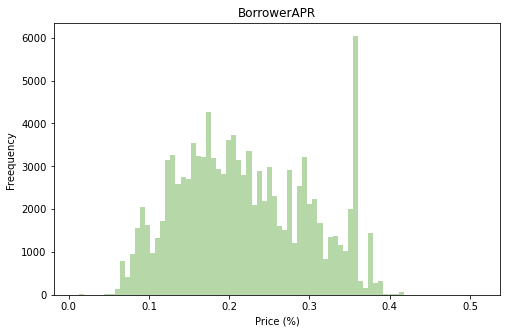

In [12]:

#bins = np.arange(0, PL['BorrowerAPR'].max()+binsize, binsize)
display_plot( PL['BorrowerAPR'], 'Price (%)', 'BorrowerAPR')
plot.xlabel('Price (%)')
plot.ylabel('Freequency ')
plot.title('BorrowerAPR');



> There is a narrow rise at 0.9 and a small low point centered 0.28, there is a significant high point at 0.2, as well as a high point between 0.34 and 0.36, and only a few loans have an APR greater than 0.42%.

In [13]:
# loans with APR greater than 0.42
PL[PL.BorrowerAPR>0.42]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
18326,0161336483146123835D6A5,1795,2006-03-11 15:43:45.393000000,HR,36,Defaulted,2007-01-14 00:00:00,0.45857,0.4500,0.4325,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,F555336594467179889CEFB,2006-02-20 16:42:34.790000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10252,Not displayed,True,10000.000000,EABB336549566056637F106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257,10.0,96,196,3000,2006-03-15 00:00:00,Q1 2006,46243366250335229AA624A,153.21,744.65,170.76,573.89,-6.62,0.00,2829.24,2829.24,0.0,1.0,0,0,0.0,21
22195,5686336572505607862C0C7,1849,2006-03-12 13:44:15.060000000,HR,36,Chargedoff,2009-02-15 00:00:00,0.46201,0.4500,0.4325,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,F555336594467179889CEFB,2006-03-12 11:53:40.663000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.35430,Not displayed,True,2916.666667,C6523364419622003354C47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,35.0,96,216,1789,2006-03-17 00:00:00,Q1 2006,CA5B33655646805937B99A5,91.37,2701.03,1298.50,1402.53,-16.04,0.00,490.46,490.50,0.0,1.0,0,0,0.0,21
36018,844033650124564886B3EDC,690,2006-02-23 13:57:02.087000000,HR,36,Completed,2006-03-14 00:00:00,0.51229,0.4975,0.4925,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2006-02-23 13:57:02.087000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02852,Not displayed,True,2838.000000,08423365150780340A7980C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,97,89,1500,2006-02-27 00:00:00,Q1 2006,45F83366003403405932608,80.94,1530.67,1500.00,30.67,-0.29,0.00,0.00,0.00,0.0,1.0,0,0,0.0,9
56761,A79D33661366830833F3EF5,2231,2006-03-16 19:30:16.753000000,HR,36,Defaulted,2006-09-19 00:00:00,0.50633,0.4975,0.4800,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,F555336594467179889CEFB,2006-03-16 18:39:30.963000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03909,Not displayed,False,0.000000,51A6336556683591380DA02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211,6.0,96,245,3000,2006-03-21 00:00:00,Q1 2006,9151336553609388240ECB8,161.88,158.70,35.12,123.58,-1.27,0.00,2964.88,2964.88,0.0,1.0,0,0,0.0,21
82043,BBED336465905564254DC8B,1112,2006-03-02 19:00:17.593000000,HR,36,Defaulted,2006-09-05 00:00:00,0.48873,0.4800,0.4750,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2006-03-02 11:32:57.0400000

>There are no Prosper rating or employment status records for the six borrowers with the highest APR.

### Estimated Return


In [14]:
PL.EstimatedReturn.isnull().sum() #checking for the sum of null values

29084

In [15]:
#drop null rows
PL.EstimatedReturn.dropna(axis = 0, inplace = True)

In [16]:
PL.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

> The range of estimated returns is -18% to 28%.



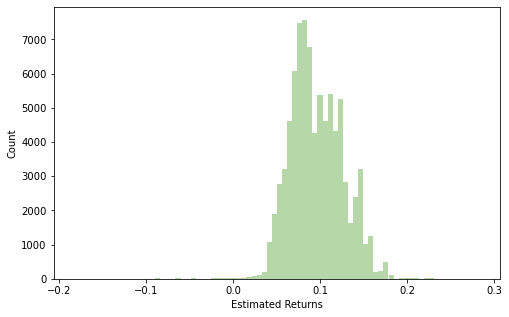

In [17]:
# plot histogram
display_plot( PL['EstimatedReturn'], 'Estimated Returns',  'BorrowerAPR')
plot.xlabel('Estimated Returns')
plot.ylabel('Count');


>  Loans have an estimated return between 0% and 20%.



D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


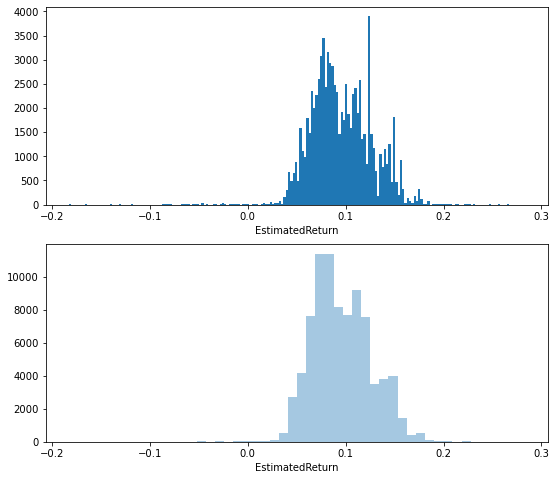

In [18]:
# ploting EstimatedReturn
fig, ax = plot.subplots(nrows=2, figsize = [9,8])
variable = ['EstimatedReturn']
for i in range(len(variable)):
    var = variable[i]
    sb.distplot(PL.EstimatedReturn,kde = False  )
    ax[i].hist(data = PL, x = var, bins = 200)
    ax[i].set_xlabel('{}'.format(var))

plot.show()

>  Surprisingly, the largest bin is around 12.5% and there are a few maxima in some standard values, such as 5.3%, 7.4%, and 15%.

### IncomeRange


In [19]:
PL.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [20]:
# Replacing not displayed in 0$ income with Not employed 
PL['IncomeRange'].replace(['$0', 'Not displayed'], 'Not employed', inplace = True)


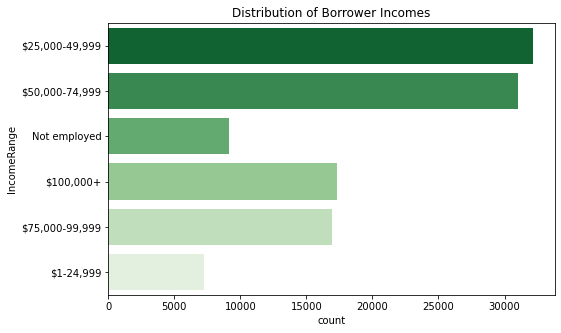

In [21]:
plot.figure(figsize = [8, 5])
sb.countplot(data=PL, y='IncomeRange',palette ='Greens_r')
plot.title('Distribution of Borrower Incomes');

> The majority of loan requests come from borrowers with incomes of between 25,000k and 49,000k.

### Debt to Income Ratio

In [22]:
PL.DebtToIncomeRatio.describe()


count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


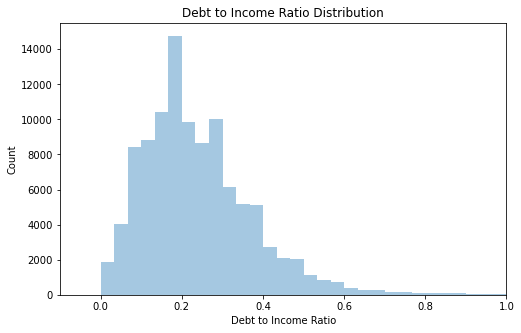

In [23]:
# distribution plot
plot.figure(figsize = [8,5])
sb.distplot(PL.DebtToIncomeRatio, kde = False, bins = 300)
plot.xlim(-.1, 1)
plot.xlabel('Debt to Income Ratio')
plot.ylabel('Count')
plot.title('Debt to Income Ratio Distribution');

> as shown, borrowers who request a loan have a 20% debt to income ratio.

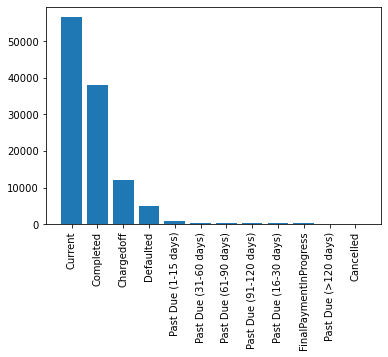

In [24]:
# Checking for the loan status 
LoanStat = PL['LoanStatus'].value_counts()
plot.bar(LoanStat.index, LoanStat)
plot.xticks(rotation = 90);

The highest rate is for borrowers who are still paying their loan, followed by borrowers who completed paying for their loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusual disributions.

## Bivariate Exploration



In [25]:
num_variabls = [ 'BorrowerAPR', 'LoanOriginalAmount','EstimatedReturn','DebtToIncomeRatio']
cat_variabls  = ['EmploymentStatus','Term', 'ProsperRating (Alpha)']

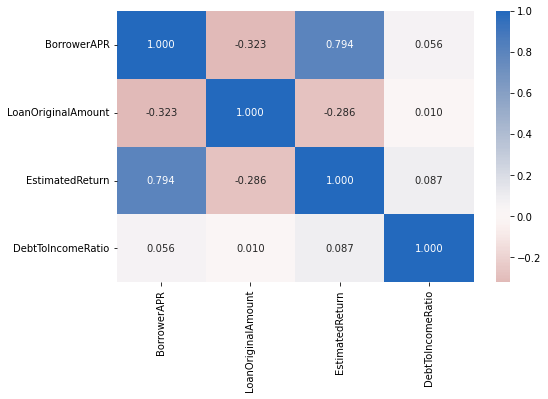

In [26]:
# correlation plot
plot.figure(figsize = [8, 5])
sb.heatmap(PL[num_variabls].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

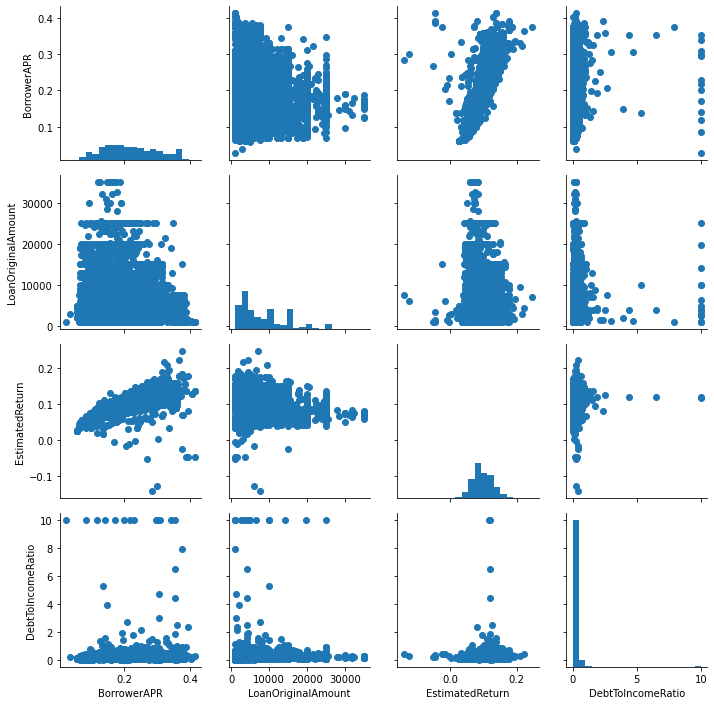

In [27]:
# plot matrix: sample 5000 loans so that plots are clearer 

PL_S = PL.sample(n=5000, replace = False)
g = sb.PairGrid(data = PL_S, vars = num_variabls)
g = g.map_diag(plot.hist, bins = 20)
g.map_offdiag(plot.scatter);

> The scatter plot also demonstrates that BorroerAPR and LoanOrignalAmount are negatively correlated with a -0.3 correlation coefficient, the lower the APR, the greater the loan amount. 

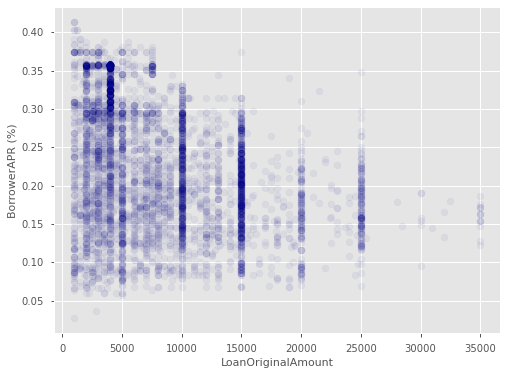

In [146]:
# scatter plot of LoanOriginalAmount vs. BorrowerAPR,

plot.figure(figsize = [8, 6])
plot.scatter(data = PL_S, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 0.05, color= 'darkblue')
plot.xlabel('LoanOriginalAmount')
plot.ylabel('BorrowerAPR (%)')
plot.show()

> APR has a wide range at various loan amounts, but that as loan amounts rise, the APR range reduces

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: 

<Figure size 720x720 with 0 Axes>

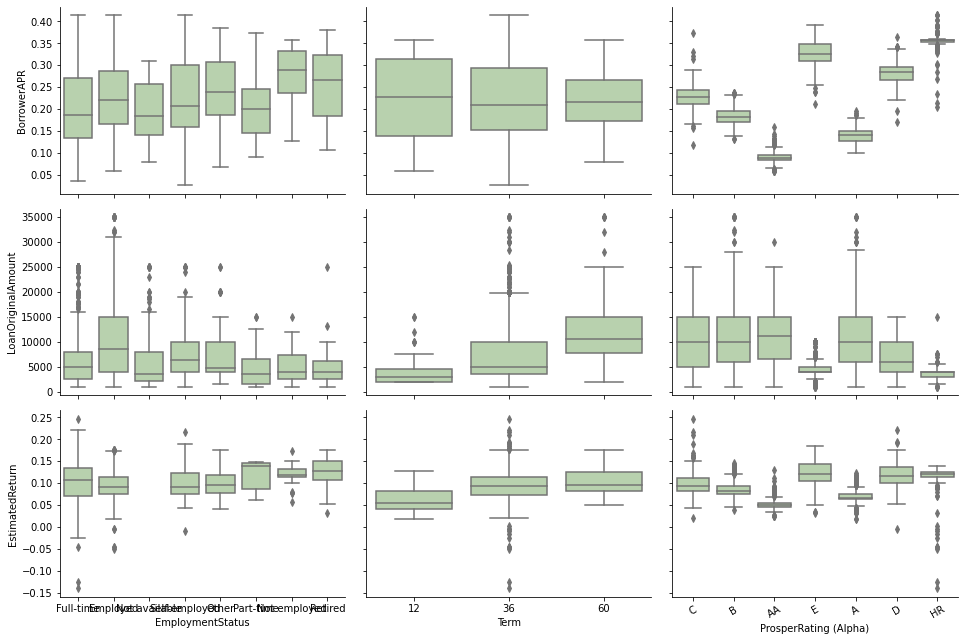

In [29]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = '#b6d7a8')
plot.figure(figsize = [10, 10])
g = sb.PairGrid(data = PL_S, y_vars = ['BorrowerAPR', 'LoanOriginalAmount','EstimatedReturn'], 
                x_vars = cat_variabls, height = 3, aspect = 1.5)
g.map(boxgrid);
plot.xticks(rotation=30);

> The lowest APRs are offered by borrowers with the highest Prosper ratings,the loan amount rises as the loan term lengthens, and the better the rating, the lower the borrower APR. 

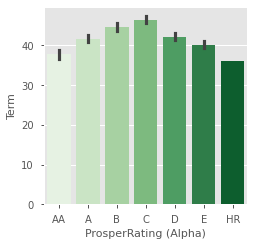

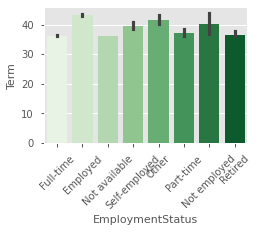

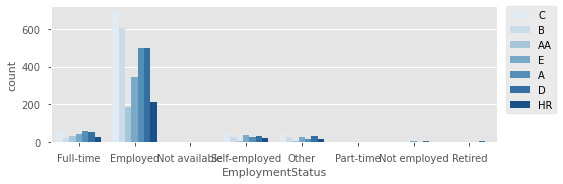

In [144]:
plot.figure(figsize = [8, 8])

ordered_alpha = ['AA','A','B','C','D','E', 'HR']
# subplot 1: Prosper rating vs term
plot.subplot(2, 2, 1)
sb.barplot(data = PL_S, x = 'ProsperRating (Alpha)', y = 'Term', order = ordered_alpha , palette = 'Greens');
plot.show()

# subplot 2: employment status vs. term, use different color palette

plot.subplot(2, 2, 1)
sb.barplot(data= PL_S, x='EmploymentStatus', y='Term', palette = 'Greens')
plot.xticks(rotation = 45)
plot.show()

# subplot 3: Prosper rating vs. employment status
plot.subplot(2, 1, 1)
aix=sb.countplot(data = PL_S, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plot.show()



> It is clear that term and Prosper rating interact in some way, there are proportionally more 60-month loans with B and C grades. 
Borrowers with HR ratings can only get loans for 36 months.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The scatter plot also demonstrates that BorroerAPR and LoanOrignalAmount are negatively correlated with a -0.3 correlation coefficient, the lower the APR, the greater the loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  It is clear that term and Prosper rating interact in some way, there are proportionally more 60-month loans with B and C grades. 

## Multivariate Exploration

In this section of the analysis, my main focus is on how the categorical variables—Prosper rating and term—affect the correlation between borrower APR and loan orignal amount.


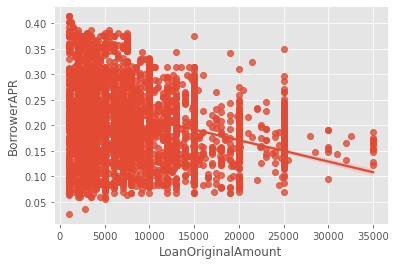

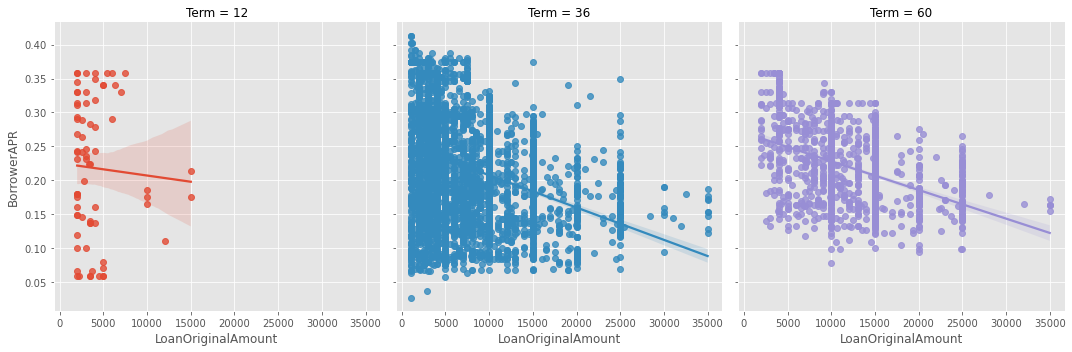

In [55]:
# term effects on the APR/loan amount relationship
sb.regplot( x='LoanOriginalAmount',  y='BorrowerAPR', data=PL_S)
plot.xlabel( 'LoanOriginalAmount')
plot.ylabel('BorrowerAPR');
sb.lmplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = PL_S, hue = 'Term', col = 'Term');

 > The relation between the loan amount and APR appears to be unaffected by the term.

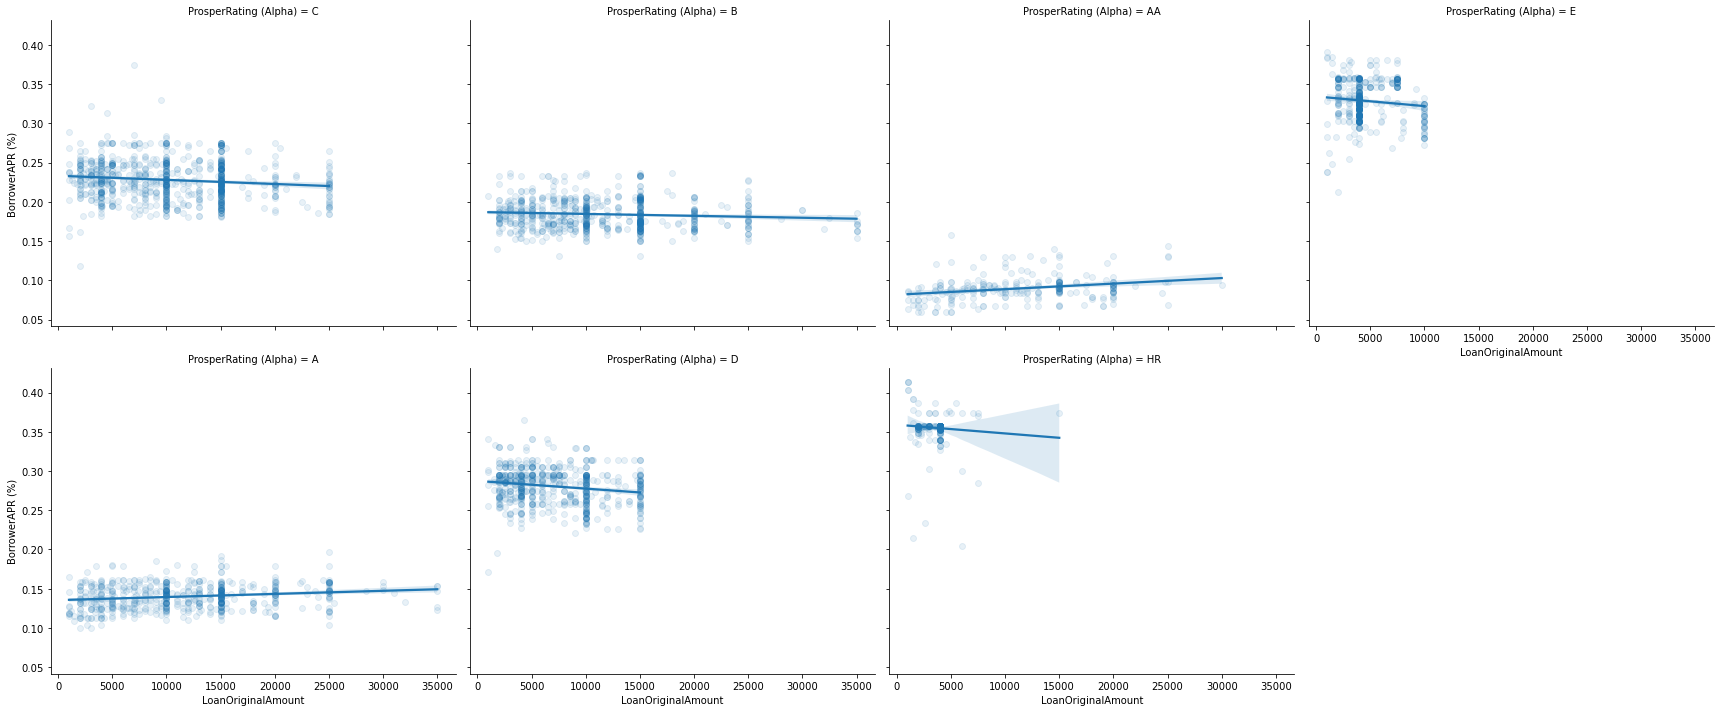

In [42]:
# Prosper rating effect on APR and loan amount relationship 
g=sb.FacetGrid(data=PL_S, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('BorrowerAPR (%)')

plot.show()

> A higher rating raises the loan amount. A better rating lowers the borrower APR.

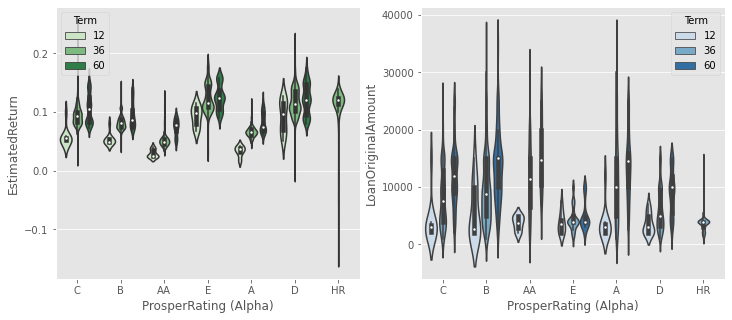

In [65]:
fig, ax = plot.subplots(ncols=2, figsize=[12,5])
sb.violinplot(data = PL_S, x = 'ProsperRating (Alpha)', y = 'EstimatedReturn', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[0])
sb.violinplot(data = PL_S, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1]);

> There is a relationship between term and Estimated Return for loan amount. We can see that a higher Prosper rating results in higher loan amounts, the same goes for LoanOriginalAmount.

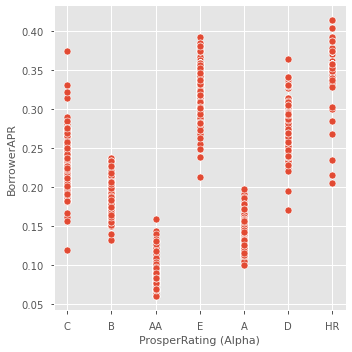

In [85]:
plot.style.use('seaborn-notebook')
sb.relplot(x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', data = PL_S );
plot.show() 

 > It's interesting to note that for borrowers with HR-C rates, the borrower APR decreases as the borrow period lengthens. However, the APR rises as the length of the loan increases for borrowers with B-AA grades.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The results of the multivariate analysis revealed that when the Prosper ratings rise from HR to AA, the link between borrower APR and loan amount shifts from being negatively to sluggishly positively. I then looked into how terms and ratings affected loan amounts, and the results showed that with better Prosper ratings, the loan amounts for all three terms increased

### Were there any interesting or surprising interactions between features?

> Unexpectedly, the borrower APR and loan amount have a negative link when the borrower's Prosper rating is between HR and B, but a positive correlation when the borrower's rating is between A and AA. Another intriguing finding is that for borrowers with HR-C rates, the borrower APR decreases as the borrow time lengthens. However, the APR rises with the length of the loan for those with B-AA credit ratings.